## Synthetic dataset

In [8]:
import src.OnlineSLE.IIAI_synthetic as gensyn
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.tsatools import detrend
from scipy.stats import zscore
import pandas as pd
import os
import json

## Figure 4.9

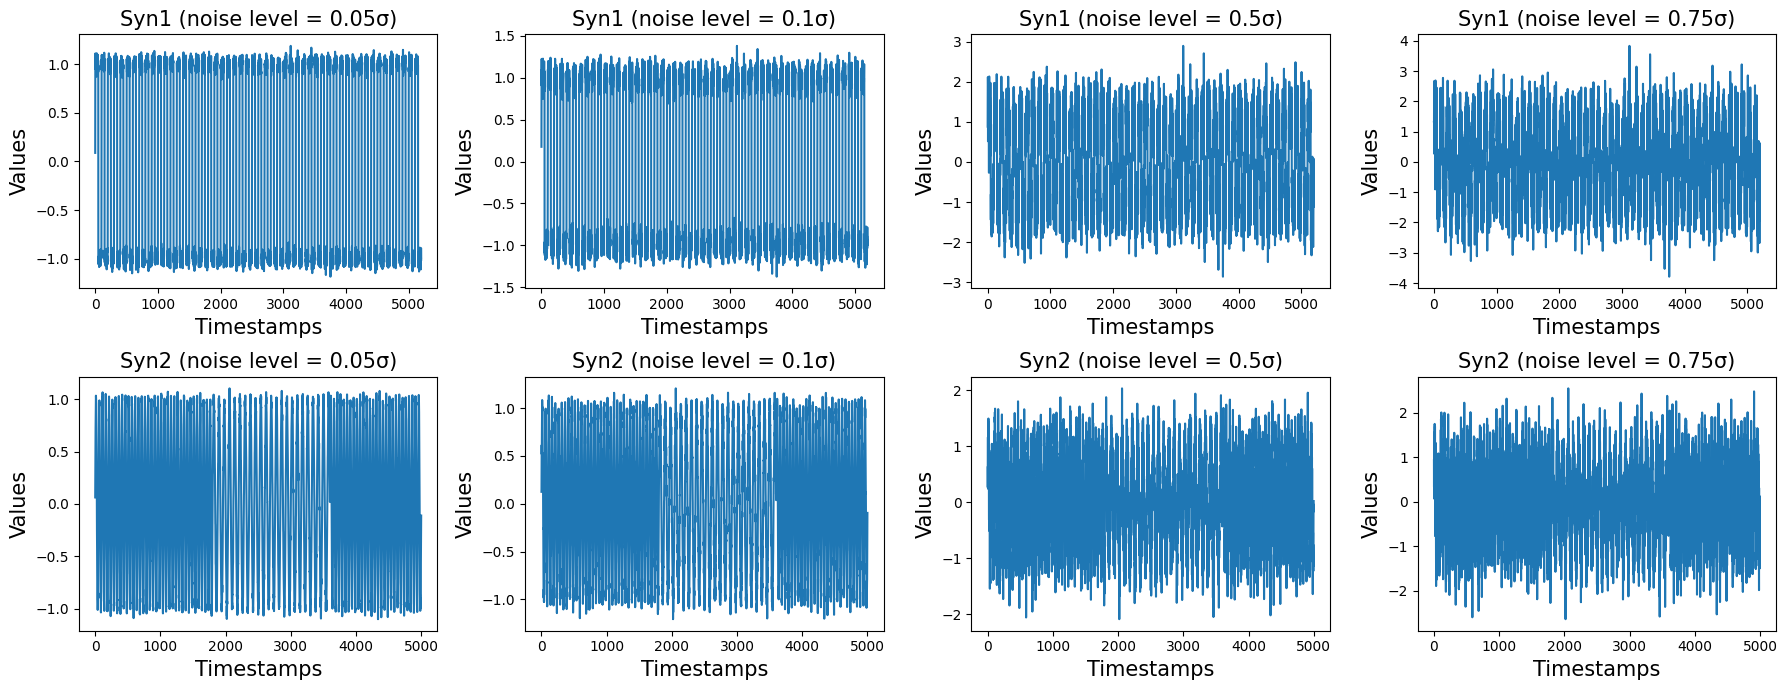

In [9]:
fig, axes = plt.subplots(2, 4, figsize=(18, 7))
axes = axes.flatten()
noise_levels = [0.05, 0.10, 0.50, 0.75, 0.05, 0.10, 0.50, 0.75]
for i in range(len(axes)):
    if i < 4:
        data = gensyn.generate_syn1(residual_rate=noise_levels[i], is_export=False)
        title = f'Syn1 (noise level = {noise_levels[i]}σ)'
    else:
        data = gensyn.generate_syn2(residual_rate=noise_levels[i], is_export=False)
        title = f'Syn2 (noise level = {noise_levels[i]}σ)'
    
    axes[i].plot(data['ts'])
    axes[i].set_title(title, fontsize=15)
    axes[i].set_xlabel('Timestamps', fontsize=15)
    axes[i].set_ylabel('Values', fontsize=15)

plt.tight_layout()
plt.show()

## Figure 4.10  real world dataset

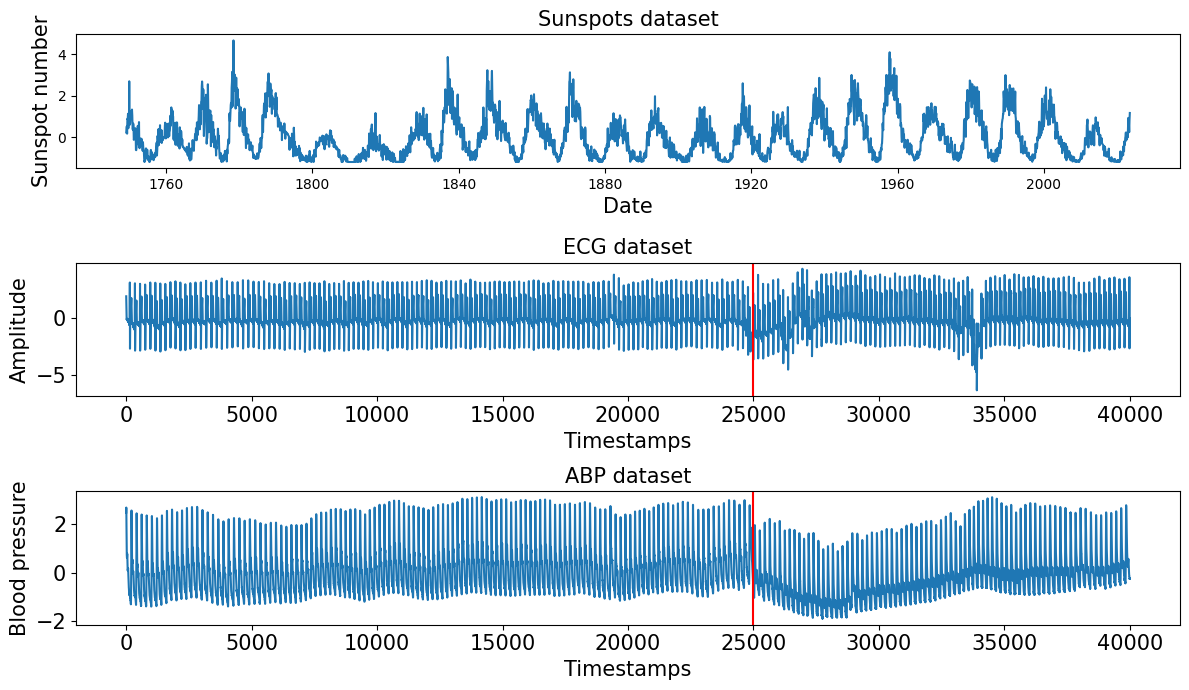

In [10]:
file_names = ['TiltECG_200_25000','TiltABP_210_25000']
full_path = os.path.expanduser("~/source_code/thesis_sourcecode/datasets/")


# fig, axs = plt.subplots(1, 2, figsize=(12, 3.5))
fig, axs = plt.subplots(3, 1, figsize=(12, 7))
for index, file_name in enumerate(file_names):
    ts_data = np.loadtxt(f'{full_path}{file_name}.txt')
    ts_data = detrend(ts_data, order=2)
    ts_data = zscore(ts_data)


    # axs[index].plot(ts_data[:1600])
    axs[index+1].plot(ts_data)
    axs[index+1].axvline(x=25000, color='r')

file_name = os.path.expanduser("~/source_code/thesis_sourcecode/datasets/06_sunspots.json")
with open(file_name, 'r') as file:
    json_data = json.load(file)

sun = []
sun = pd.Series(json_data['ts'])
start_date = '1749-01-01'
end_date = '2023-07-01'
date_sequence = pd.date_range(start=start_date, end=end_date, freq='ME')
sun_df = pd.DataFrame({'Date': date_sequence, 'Data': sun})
axs[0].plot(sun_df['Date'], zscore(sun_df['Data']))
axs[0].set_title('Sunspots dataset', fontsize=15)
axs[0].set_xlabel('Date', fontsize=15)
axs[0].set_ylabel('Sunspot number', fontsize=15)


axs[1].set_title('ECG dataset', fontsize=15)
axs[1].set_xlabel('Timestamps', fontsize=15)
axs[1].set_ylabel('Amplitude', fontsize=15)
axs[1].tick_params(axis='both', which='major', labelsize=15)

axs[2].set_title('ABP dataset', fontsize=15)
axs[2].set_xlabel('Timestamps', fontsize=15)
axs[2].set_ylabel('Blood pressure', fontsize=15)
axs[2].tick_params(axis='both', which='major', labelsize=15)


# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()

## Figure 4.11

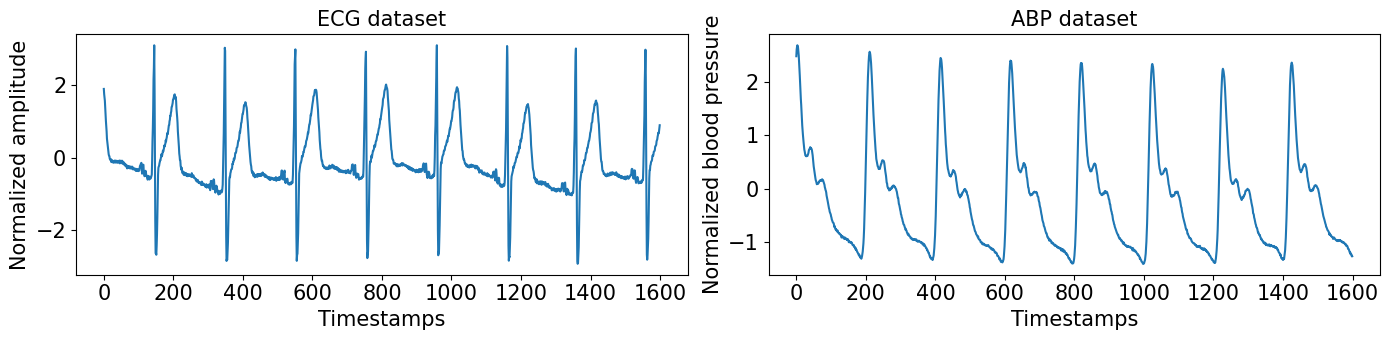

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(14, 3.5))
for index, file_name in enumerate(file_names):
    ts_data = np.loadtxt(f'{full_path}{file_name}.txt')
    ts_data = detrend(ts_data, order=2)
    ts_data = zscore(ts_data)
    axs[index].plot(ts_data[:1600])


axs[0].set_title('ECG dataset', fontsize=15)
axs[0].set_xlabel('Timestamps', fontsize=15)
axs[0].set_ylabel('Normalized amplitude', fontsize=15)
axs[0].tick_params(axis='both', which='major', labelsize=15)

axs[1].set_title('ABP dataset', fontsize=15)
axs[1].set_xlabel('Timestamps', fontsize=15)
axs[1].set_ylabel('Normalized blood pressure', fontsize=15)
axs[1].tick_params(axis='both', which='major', labelsize=15)
# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()